## Task:1 Data Cleaning and Preprocessing

**Dataset : Customer Personality Analysis**

In [4]:
#Importing Libraries:

#Import Pandas Library and make it as pd:
import pandas as pd

#Import NumPy Library and make it as np:
import numpy as np

#Import PyPlot from Matplotlib Library and make it as plt:
import matplotlib.pyplot as plt

#Import Seaborn Library and make it as sns:
import seaborn as sns 

#Inorder to Supress Warnings import Filterwarnings:
from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
# Loading Dataset:

df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
# Display head of the Dataset:
# head() displays first five rows:

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# Display tail of Dataset:
# tail() displays last five rows:

df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [16]:
#Finding size of the data:
df.shape

(200, 5)

In [18]:
# Summary of all the variables in the Dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
# Unique values in the dataset:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [24]:
# Descriptive Statistic analysis(Five point summary of the given dataset)

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
# Check the variable types:

df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [28]:
# Check for the Duplicate Values from the Dataset:
df.duplicated().sum()

0

In [30]:
# Ckeck for the Null values from the Dataset:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [69]:
# Skewness of the Dataset:
df.skew()

Gender                    0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [71]:
# Kurtosis of the Dataset;
df.kurt()

Gender                   -1.960375
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

In [55]:
# Filtering the Numerical columns from the Dataset

df_num = df.select_dtypes(include = [np.number])
df_num.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81


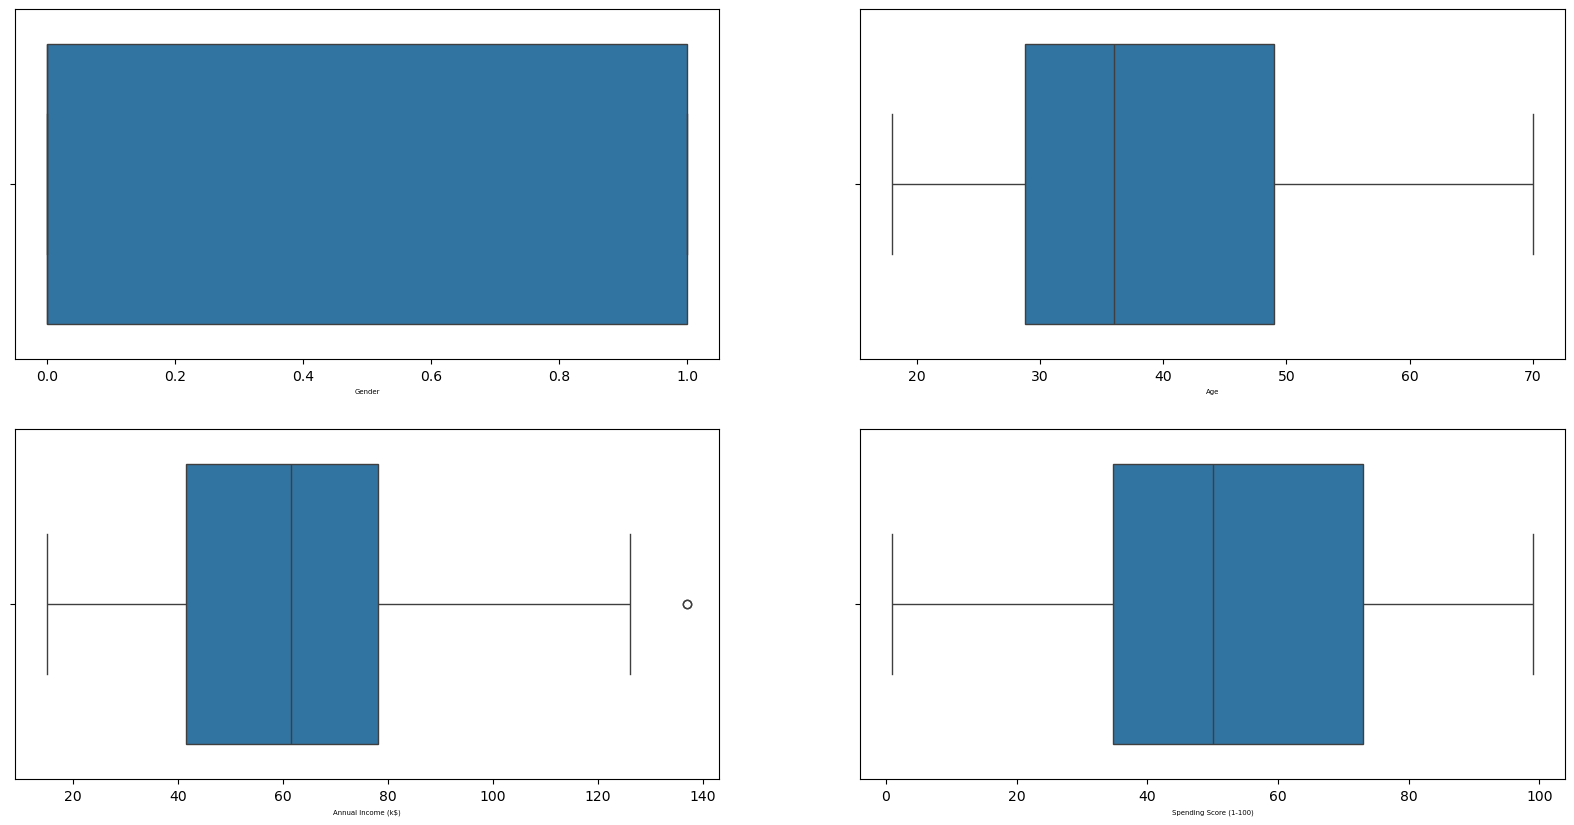

In [57]:
# Plotting outliers using boxplot:
fig, ax = plt.subplots(2,2, figsize = (20,10))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = 'h', whis = 1.5, ax = subplot)
    z.set_xlabel(variable, fontsize = 5)

In [59]:
# Obtain the First Quartiles:
Q1 = df_num.quantile(0.25)

# Obtain the Third Quartile:
Q3 = df_num.quantile(0.75)

# Obtain the IQR
IQR = Q3-Q1
IQR

Gender                     1.00
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [61]:
# Filter out the Outlier Values:
# ~ : select all the rows which do not satisfy the condition
# any():returns whether the element is True over the Column
df_iqr = df[~((df<(Q1 - 1.5 * IQR))|(df>(Q3+1.5*IQR))).any(axis = 1)]

In [63]:
# Sanitary check after removing outliers
df_iqr.shape

(198, 4)

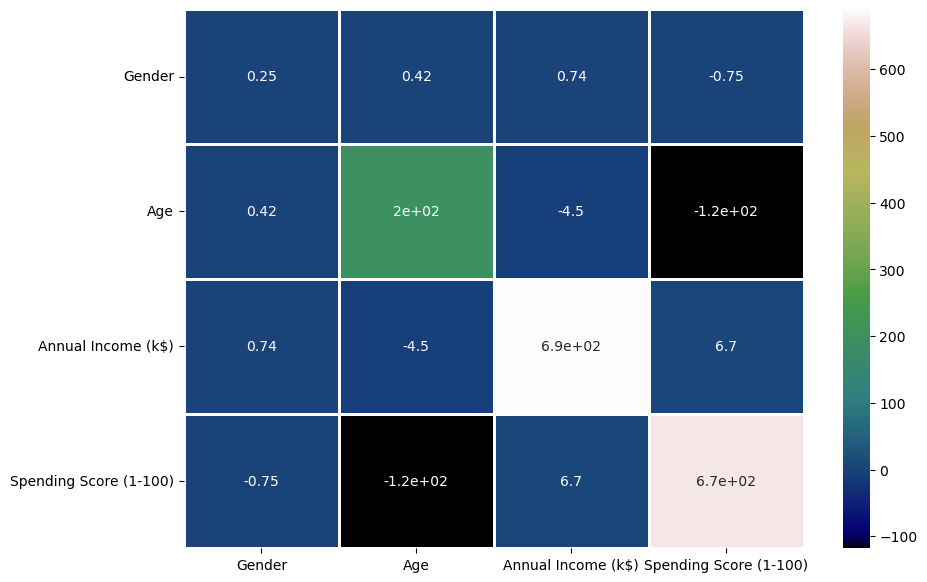

In [65]:
# Covariance

cov = df.cov(numeric_only = True)
cov

fig,ax = plt.subplots(figsize = (10,7))

sns.heatmap(cov,annot = True,linewidth = 0.95,
           cmap = 'gist_earth',fmt = '.2g')

# Show the plot:
plt.show()

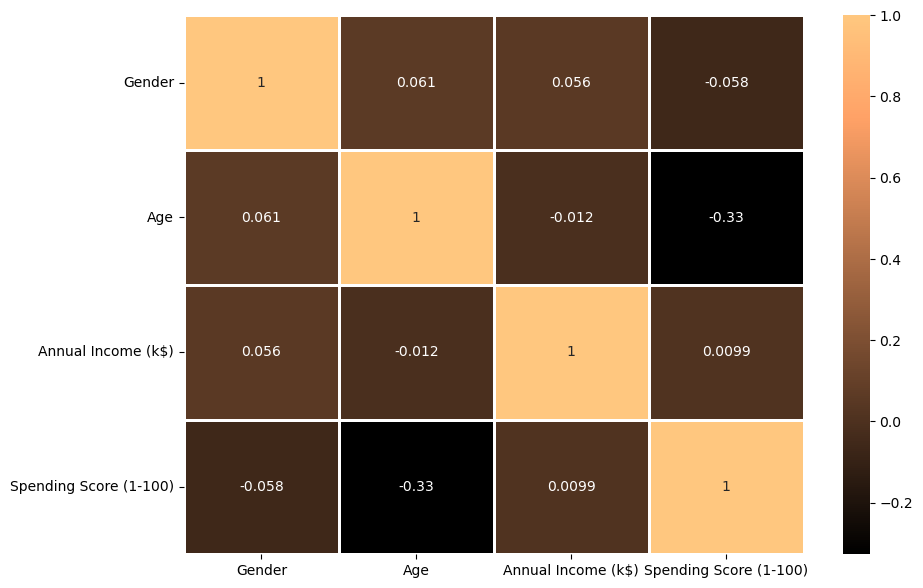

In [67]:
# Correlation Matrix

corr = df.corr(numeric_only = True)
corr

fig,ax = plt.subplots(figsize = (10,7))

sns.heatmap(corr,annot = True,linewidths = 0.95,
           cmap = 'copper',fmt = '.2g')

# Show the plot:
plt.show()

### **Preprocessing**

In [32]:
# Drop irrelevant columns
df = df.drop("CustomerID",axis=1)


In [34]:
# Importing necessary libraries for preprocessing:

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [36]:
# Encode categorical variables (Gender)
# Male = 1, Female = 0

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [38]:
# Sanitary check
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Feature Scaling 

In [43]:
# Feature Scaling

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [49]:
# Optional: Convert back to DataFrame for readability

df_scaled = pd.DataFrame(scaled_features,columns=df.columns)

In [45]:
# Import the train_test split module from sklearn
from sklearn.model_selection import train_test_split

In [51]:
# Train-test split

X = df_scaled  # No target column since it is Unsupervised(Clustering)

# But if doing Supervised Learning: Y = df_scaled['Target'], and drop 'Target' from X

X_train, X_test = train_test_split(X, test_size = 0.2, random_state=42)

In [53]:
# Output to verify

print("Preprocessed Data Sample:")
print(X_train.head())

Preprocessed Data Sample:
       Gender       Age  Annual Income (k$)  Spending Score (1-100)
79  -0.886405  0.728432           -0.250391               -0.318337
197  1.128152 -0.491602            2.497807                0.923953
38  -0.886405 -0.204535           -0.899272               -0.939482
24  -0.886405  1.087265           -1.242797               -1.405340
122 -0.886405  0.082532            0.322150                0.302808


<br>

### Data Preprocessing Summary: Mall Customer Segmentation Dataset

**Objective:**
Prepare the dataset for clustering by transforming raw data into a suitable format through preprocessing steps.

- 1. Dataset Overview
The dataset consists of customer attributes:

   CustomerID (Unique identifier)

   Gender (Categorical)

   Age (Numerical)

   Annual Income (k$) (Numerical)

   Spending Score (1-100) (Numerical)

**There are no missing values or duplicates in this dataset, so the cleaning phase is minimal.**

- 2. Dropping Irrelevant Columns
  The CustomerID column is dropped as it doesn't contribute to customer segmentation.



- 3. Encoding Categorical Variables
   The Gender column is label encoded:

     Male → 1

     Female → 0

This transforms categorical data into numeric format for compatibility with ML models.

- 4. Feature Scaling
  All numerical features are scaled using StandardScaler to standardize the feature distribution (mean = 0, standard deviation = 1).

  This helps distance-based models like KMeans perform effectively.

- 5. Train-Test Split
The dataset is split into training and testing sets using an 80/20 ratio.

Though clustering (unsupervised) doesn’t require labeled data, this split can help in evaluating clustering performance on unseen data later.
